In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data[:, :2]
y = (iris.target != 0) * 1
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

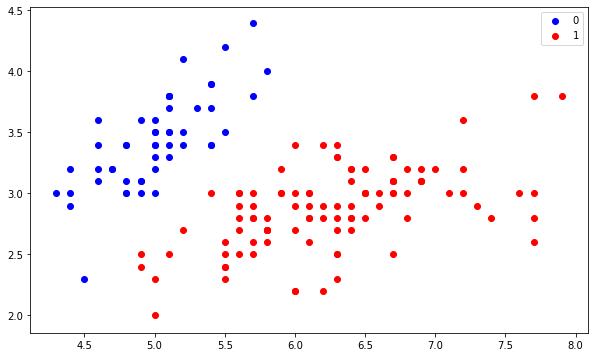

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend();

In [11]:
import numpy as np


class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100, fit_intercept=True, verbose=False):
        self.lr = lr  # learning_rate of the algorithm
        self.num_iter = num_iter  #  number of iterations of the gradient descent
        self.fit_intercept = fit_intercept  # boolean indicating whether we`re adding base X0 feature vector or not
        self.verbose = verbose  

    def _add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))  #  creating X0 features vector(M x 1)
        return np.concatenate((intercept, X), axis=1)  # concatenating X0 features vector with our features making intercept

    def _sigmoid(self, z):
        

        return 1 / (1 + np.exp(-z))

    def _loss(self, h, y):
        '''
        Functions have parameters or weights and we want to find the best values for them.
        To start we pick random values and we need a way to measure how well the algorithm performs using those random weights.
        That measure is computed using the loss function
        '''

        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    def train(self, X, y):
        '''
        Function for training the algorithm.
            parameters:
              X - input data matrix (all our features without target variable)
              y - target variable vector (1/0)
            
            return:
              None
        '''

        if self.fit_intercept:
            X = self._add_intercept(X)  # X will get a result with "zero" feature

        self._weights = np.zeros(X.shape[1])  #  inicializing our weights vector filled with zeros
        
        for i in range(self.num_iter):  # implementing Gradient Descent algorithm
            z = np.dot(X, self._weights)  #  calculate the product of the weights and predictor matrix
            h = self._sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self._weights -= self.learning_rate * gradient
            
            if (self.verbose == True and i % 10000 == 0):
                z = np.dot(X, self._weights)
                h = self._sigmoid(z)
                print(f'loss: {self._loss(h, y)} \t')

    def predict_prob(self, X):  
        if self.fit_intercept:
            X = self._add_intercept(X)
    
        return self._sigmoid(np.dot(X, self._weights))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold

In [12]:
model = LogisticRegression(lr=0.1, num_iter=300000)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer


X, y = load_breast_cancer(return_X_y=True)  # load the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)  # split the dataset

# Create an instance of the LogisticRegression class

logit = LogisticRegression(lr=0.1, num_iter=200000)  # you can play with hyperparameters to understand how learning rate works.

# Train the model

logit.train(X_train, y_train)

# Normalize output generated by sigmoid function

y_pred = [int(round(x)) for x in logit.predict_prob(X_test).flatten()]  # you can do it much sipler it`s just me

# look at the score

score = accuracy_score(y_test, y_pred)  # 0.956 -> 95.6 %.

AttributeError: 'LogisticRegression' object has no attribute 'learning_rate'

In [18]:
import numpy as np


class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iter=100, fit_intercept=True, verbose=False):
        self.learning_rate = learning_rate  # learning_rate of the algorithm
        self.num_iter = num_iter  #  number of iterations of the gradient descent
        self.fit_intercept = fit_intercept  # boolean indicating whether we`re adding base X0 feature vector or not
        self.verbose = verbose  

    def _add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))  #  creating X0 features vector(M x 1)
        return np.concatenate((intercept, X), axis=1)  # concatenating X0 features vector with our features making intercept

    def _sigmoid(self, z):
        '''Defines our "logit" function based on which we make predictions
           parameters:
              z - product of the our features with weights
           return:
              probability of the attachment to class
        '''

        return 1 / (1 + np.exp(-z))

    def _loss(self, h, y):
        '''
        Functions have parameters or weights and we want to find the best values for them.
        To start we pick random values and we need a way to measure how well the algorithm performs using those random weights.
        That measure is computed using the loss function
        '''

        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    def train(self, X, y):
        '''
        Function for training the algorithm.
            parameters:
              X - input data matrix (all our features without target variable)
              y - target variable vector (1/0)
            
            return:
              None
        '''

        if self.fit_intercept:
            X = self._add_intercept(X)  # X will get a result with "zero" feature

        self._weights = np.zeros(X.shape[1])  #  inicializing our weights vector filled with zeros
        
        for i in range(self.num_iter):  # implementing Gradient Descent algorithm
            z = np.dot(X, self._weights)  #  calculate the product of the weights and predictor matrix
            h = self._sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self._weights -= self.learning_rate * gradient
            
            if (self.verbose == True and i % 10000 == 0):
                z = np.dot(X, self._weights)
                h = self._sigmoid(z)
                print(f'loss: {self._loss(h, y)} \t')

    def predict_prob(self, X):  
        if self.fit_intercept:
            X = self._add_intercept(X)
    
        return self._sigmoid(np.dot(X, self._weights))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer


X, y = load_breast_cancer(return_X_y=True)  # load the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)  # split the dataset

# Create an instance of the LogisticRegression class

logit = LogisticRegression(learning_rate=0.1, num_iter=200000)  # you can play with hyperparameters to understand how learning rate works.

# Train the model

logit.train(X_train, y_train)

# Normalize output generated by sigmoid function

y_pred = [int(round(x)) for x in logit.predict_prob(X_test).flatten()]  # you can do it much sipler it`s just me

# look at the score

score = accuracy_score(y_test, y_pred)  # 0.956 -> 95.6 %.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp


In [20]:
score

0.956140350877193

In [1]:
def sigmoid(x):
    
    return 1/(1+np.exp(-x))

In [2]:
def compute_cost(X, y,w):
    h = sigmoid(X @ w)
    
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()


In [3]:
def gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - (learning_rate/m) * (X.T @ (sigmoid(X @ params) - y)) 
        cost_history[i] = compute_cost(X, y, params)

    return (cost_history, params)

In [4]:
def predict(X, params):
    return np.round(sigmoid(X @ params))

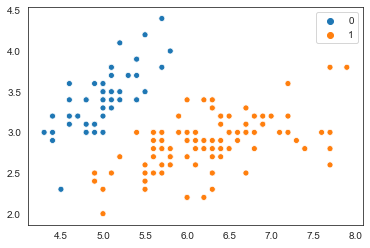

In [9]:
#from sklearn.datasets import make_classification
from sklearn import datasets
import seaborn as sns
iris = datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1
#X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1,
                            # n_clusters_per_class=1, random_state=14)

#y = y[:,np.newaxis]
sns.set_style('white')
sns.scatterplot(X[:,0],X[:,1],hue=y.reshape(-1));

In [11]:
import numpy as np

m = len(y)

X = np.hstack((np.ones((m,1)),X))
n = np.size(X,1)
params = np.zeros((n,1))

iterations = 1500
learning_rate = 0.03

initial_cost = compute_cost(X, y, params)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, params_optimal) = gradient_descent(X, y, params, learning_rate, iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()



Initial Cost is: 0.6931471805599454 

Optimal Parameters are: 
 [[-0.18198922 -0.18198922 -0.18198922 -0.18198922 -0.18198922 -0.18198922
  -0.18198922 -0.18198922 -0.18198922 -0.18198922 -0.18198922 -0.18198922
  -0.18198922 -0.18198922 -0.18198922 -0.18198922 -0.18198922 -0.18198922
  -0.18198922 -0.18198922 -0.18198922 -0.18198922 -0.18198922 -0.18198922
  -0.18198922 -0.18198922 -0.18198922 -0.18198922 -0.18198922 -0.18198922
  -0.18198922 -0.18198922 -0.18198922 -0.18198922 -0.18198922 -0.18198922
  -0.18198922 -0.18198922 -0.18198922 -0.18198922 -0.18198922 -0.18198922
  -0.18198922 -0.18198922 -0.18198922 -0.18198922 -0.18198922 -0.18198922
  -0.18198922 -0.18198922  0.18198922  0.18198922  0.18198922  0.18198922
   0.18198922  0.18198922  0.18198922  0.18198922  0.18198922  0.18198922
   0.18198922  0.18198922  0.18198922  0.18198922  0.18198922  0.18198922
   0.18198922  0.18198922  0.18198922  0.18198922  0.18198922  0.18198922
   0.18198922  0.18198922  0.18198922  0.1819892

NameError: name 'plt' is not defined

In [12]:


y_pred = predict(X, params_optimal)
score = float(sum(y_pred == y))/ float(len(y))

print(score)



TypeError: only size-1 arrays can be converted to Python scalars

ValueError: operands could not be broadcast together with shapes (150,) (2,) 

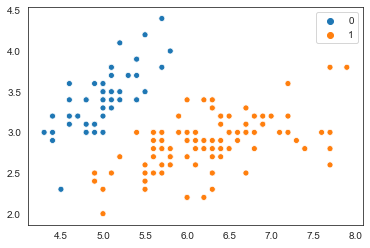

In [14]:

import matplotlib.pyplot as plt
slope = -(params_optimal[1] / params_optimal[2])
intercept = -(params_optimal[0] / params_optimal[2])

sns.set_style('white')
sns.scatterplot(X[:,1],X[:,2],hue=y.reshape(-1));

ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = intercept + (slope * x_vals)
plt.plot(x_vals, y_vals, c="k");



In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [5]:
iris=datasets.load_iris()

In [16]:
X = iris.data[:, :2]
y = (iris.target != 0) * 1


In [18]:
m=X.shape[0]
X = np.hstack((np.ones((m,1)),X))
X.shape

(150, 3)

IndexError: too many indices for array

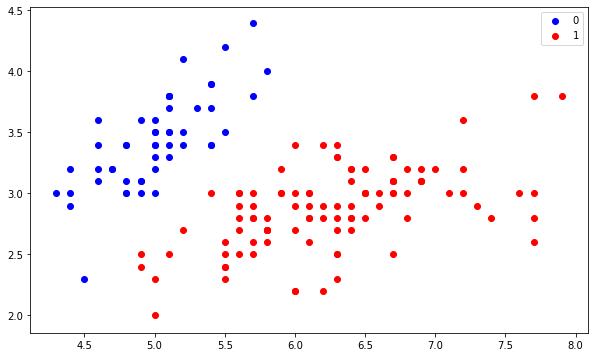

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], color='b', label='0')
plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], color='r', label='1')
plt.legend();

In [24]:
theta = np.zeros((3,3))

#learning rate
learning_rate = 0.001

#no of iterations we want our model to be trained
no_of_iterations = 200000

#to visualise the cost function
cost_arr = np.empty((0,3))

#counter
i = 1

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

for i in range(no_of_iterations):
    
    #model/hypothesis function
    lineq = np.dot(X, theta.T)
    h = sigmoid(lineq)
    
    #cost function -1/m * sum (y log h + (1-y)log(1-h))for each class
    cost = -1/m * ((Y * np.log(h)) + ((1-Y) * np.log(1-h)))
    cost = cost.sum(axis = 0)
    cost_arr = np.vstack((cost_arr, cost))
    
    #applying gradient descent to calculate new theta = theta - (learning_rate/m * summation[(h-y)*x]) -> delta
    #summation can be replace by matrix multiplication
    delta = (learning_rate/m) * np.dot((h-Y).T, X)
    theta = theta - delta  
    
    i = i + 1;

ValueError: operands could not be broadcast together with shapes (150,2) (150,3) 